<a href="https://colab.research.google.com/github/Rishu-N/COMPUTER-VISION/blob/main/VEHICLE%20COUNTING%20YOLO%20MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6zyoU6ppl06mpQIgFbVY")
project = rf.workspace("cc-pintel").project("car-counting")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Car-Counting-1 in yolov8:: 100%|██████████| 14578/14578 [00:02<00:00, 6921.54it/s]


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 20.4 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
from ultralytics import YOLO
import cv2
import torch

# Loading the dataset
dataset_path = '/content/data.yaml'  # Path to your data.yaml file

# Create a YOLOv8 model from scratch (or load pre-trained model for transfer learning)
model = YOLO('yolov8n.pt')  # YOLOv8n is the small model, you can use other sizes (e.g., yolov8m.pt)

# Train the model
results = model.train(data=dataset_path, epochs=35, imgsz=640, batch=16)  # Training parameters

# Evaluate the model on validation data
metrics = model.val()

# Save the trained model in a portable format (TorchScript)
model_path = 'yolov8_car_counting_model.torchscript.pt'
model.export(format='torchscript', path=model_path)

print(f"Model saved in TorchScript format at: {model_path}")

# Load the saved model (optional)
loaded_model = torch.jit.load(model_path)

# Now let's use the model for inference (testing on validation images to count cars)
def count_vehicles(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Perform inference
    results = model(image)

    # Extract boxes and class ids
    boxes = results[0].boxes
    class_ids = boxes.cls

    # Count vehicles (you can further refine by specifying the classes of interest)
    vehicle_count = len([cls for cls in class_ids if int(cls) in range(10)])  # Filter for vehicle classes

    # Display results
    print(f"Total number of vehicles in the image: {vehicle_count}")

    return vehicle_count
'''
# Example: Count vehicles in a validation image
validation_image_path = '/mnt/data/valid/images/sample_image.jpg'  # Replace with an actual image path
count_vehicles(validation_image_path)
'''

100%|██████████| 6.25M/6.25M [00:00<00:00, 104MB/s]


Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/Car-Counting-1/train/labels... 5536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5536/5536 [00:03<00:00, 1791.09it/s]


train: New cache created: /content/Car-Counting-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 87, len(boxes) = 31431. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Car-Counting-1/valid/labels... 1456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:01<00:00, 1001.30it/s]

val: New cache created: /content/Car-Counting-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 8572. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.62G      1.442      2.284      1.175        102        640: 100%|██████████| 346/346 [01:55<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.87it/s]


                   all       1456       8572      0.708      0.267      0.275      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.59G      1.355      1.568      1.138        147        640: 100%|██████████| 346/346 [01:51<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.08it/s]


                   all       1456       8572      0.605      0.389      0.422      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35       2.5G       1.34      1.405      1.135        124        640: 100%|██████████| 346/346 [01:47<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.16it/s]


                   all       1456       8572      0.473      0.478      0.441      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.67G      1.332      1.281      1.127        144        640: 100%|██████████| 346/346 [01:50<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:12<00:00,  3.56it/s]


                   all       1456       8572      0.615      0.517      0.519      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.47G      1.317      1.204      1.124        125        640: 100%|██████████| 346/346 [01:44<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.49it/s]


                   all       1456       8572      0.561      0.475      0.485      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.46G      1.313      1.167      1.121        132        640: 100%|██████████| 346/346 [01:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.45it/s]


                   all       1456       8572      0.592      0.474       0.47      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.53G      1.297      1.105      1.114        119        640: 100%|██████████| 346/346 [01:44<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.24it/s]


                   all       1456       8572      0.727      0.515      0.583       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.36G      1.291       1.06      1.111        133        640: 100%|██████████| 346/346 [01:44<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.16it/s]


                   all       1456       8572      0.673      0.582      0.595      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.34G      1.276      1.048      1.109        166        640: 100%|██████████| 346/346 [01:46<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.13it/s]

                   all       1456       8572      0.687      0.591      0.608      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.66G      1.274      1.022      1.104        114        640: 100%|██████████| 346/346 [01:42<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.16it/s]


                   all       1456       8572      0.713      0.587      0.617      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.62G      1.271     0.9977      1.106        143        640: 100%|██████████| 346/346 [01:45<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.37it/s]


                   all       1456       8572      0.716      0.599      0.638      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.58G      1.266      0.978      1.106        135        640: 100%|██████████| 346/346 [01:42<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.25it/s]


                   all       1456       8572      0.701      0.575      0.653      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.58G      1.258     0.9697      1.099        133        640: 100%|██████████| 346/346 [01:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.48it/s]

                   all       1456       8572      0.723      0.602      0.643      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.69G      1.254     0.9497      1.097        194        640: 100%|██████████| 346/346 [01:46<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.32it/s]

                   all       1456       8572      0.746      0.575      0.711      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.63G      1.245     0.9368      1.092        114        640: 100%|██████████| 346/346 [01:44<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.10it/s]


                   all       1456       8572      0.743      0.616      0.685      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.35G      1.246     0.9269       1.09        130        640: 100%|██████████| 346/346 [01:47<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.20it/s]


                   all       1456       8572      0.727      0.623      0.728       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.65G      1.238     0.9058      1.089        140        640: 100%|██████████| 346/346 [01:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.52it/s]


                   all       1456       8572      0.694      0.629      0.688      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.36G       1.23     0.8976      1.088        146        640: 100%|██████████| 346/346 [01:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.21it/s]

                   all       1456       8572      0.771      0.615      0.664      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.62G      1.225     0.8854      1.083        125        640: 100%|██████████| 346/346 [01:43<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.25it/s]


                   all       1456       8572      0.726      0.635      0.677      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.61G      1.226     0.8736      1.084         71        640: 100%|██████████| 346/346 [01:46<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.35it/s]


                   all       1456       8572      0.768      0.619      0.763      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.43G       1.22     0.8627      1.082        137        640: 100%|██████████| 346/346 [01:43<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.14it/s]


                   all       1456       8572       0.75      0.643      0.697      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.62G      1.216     0.8461      1.081         99        640: 100%|██████████| 346/346 [01:43<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.23it/s]


                   all       1456       8572      0.746      0.663      0.706      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.55G      1.212     0.8418      1.078        134        640: 100%|██████████| 346/346 [01:46<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.20it/s]

                   all       1456       8572      0.763      0.644      0.704      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.63G      1.202      0.824      1.073        117        640: 100%|██████████| 346/346 [01:44<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.31it/s]


                   all       1456       8572      0.749      0.636      0.693      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.64G      1.201     0.8229       1.07        162        640: 100%|██████████| 346/346 [01:51<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.42it/s]

                   all       1456       8572      0.757      0.649      0.715      0.476


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.69G      1.187      0.741       1.08         82        640: 100%|██████████| 346/346 [01:43<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.46it/s]

                   all       1456       8572      0.769       0.62      0.689       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.41G       1.18     0.7216      1.076         86        640: 100%|██████████| 346/346 [01:40<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.07it/s]


                   all       1456       8572      0.787      0.635      0.723      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35       2.5G      1.178     0.7085      1.076         90        640: 100%|██████████| 346/346 [01:41<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.16it/s]


                   all       1456       8572      0.813       0.62      0.734      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.62G      1.172     0.6959      1.076        107        640: 100%|██████████| 346/346 [01:41<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.30it/s]


                   all       1456       8572      0.751      0.673      0.833      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35       2.3G      1.169     0.6839      1.076         80        640: 100%|██████████| 346/346 [01:42<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.10it/s]


                   all       1456       8572      0.796      0.636      0.745      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.41G      1.163     0.6745      1.074        106        640: 100%|██████████| 346/346 [01:39<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.32it/s]

                   all       1456       8572      0.765      0.664      0.748      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35       2.4G      1.155      0.668      1.068        115        640: 100%|██████████| 346/346 [01:42<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:12<00:00,  3.57it/s]

                   all       1456       8572      0.781      0.665      0.754      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.44G       1.15      0.656      1.063        100        640: 100%|██████████| 346/346 [01:37<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.35it/s]


                   all       1456       8572      0.757       0.68      0.779      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.62G       1.15     0.6527      1.064         82        640: 100%|██████████| 346/346 [01:40<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.19it/s]


                   all       1456       8572      0.774      0.664      0.841      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.41G      1.145     0.6431      1.063         92        640: 100%|██████████| 346/346 [01:42<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.41it/s]

                   all       1456       8572       0.79      0.666       0.78      0.516



35 epochs completed in 1.169 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:20<00:00,  2.24it/s]


                   all       1456       8572      0.775      0.664      0.841      0.553
                   Bus         35         37      0.711      0.649      0.702      0.519
           Motorcyecle         66         88      0.654      0.559      0.701      0.351
                Pickup       1180       2986      0.788       0.88       0.92      0.627
                   SUV          1          1          1          0      0.995      0.597
                 Sedan       1149       3003      0.819      0.853      0.915      0.601
                   Suv        459        608      0.652      0.628      0.693      0.469
                 Truck        849       1461      0.782      0.901      0.916      0.669
                   Van        322        388      0.797       0.84      0.888      0.594
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102

val: Scanning /content/Car-Counting-1/valid/labels.cache... 1456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 8572. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [00:22<00:00,  4.06it/s]


                   all       1456       8572      0.774      0.664      0.841      0.552
                   Bus         35         37      0.709      0.649      0.701      0.518
           Motorcyecle         66         88      0.654       0.56      0.702      0.348
                Pickup       1180       2986      0.785      0.881       0.92      0.626
                   SUV          1          1          1          0      0.995      0.597
                 Sedan       1149       3003      0.818      0.854      0.915      0.601
                   Suv        459        608      0.647      0.628      0.693      0.468
                 Truck        849       1461      0.782      0.901      0.916       0.67
                   Van        322        388      0.796      0.838      0.888      0.592
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2


SyntaxError: '[31m[1mpath[0m' is not a valid YOLO argument. Similar arguments are i.e. ['batch=16'].

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-40d78489-37b5-4f5b-bad9-0de0d2bfc8ab.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'detect', 'pose', 'segment', 'classify'}
                MODE (required) is one of {'val', 'train', 'benchmark', 'export', 'track', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolov8n-cls.pt format=onnx imgsz=224,128

    5. Explore your datasets using semantic search and SQL with a simple GUI powered by Ultralytics Explorer API
        yolo explorer data=data.yaml model=yolov8n.pt
    
    6. Streamlit real-time webcam inference GUI
        yolo streamlit-predict
        
    7. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

In [ ]:
# Importing necessary libraries
from ultralytics import YOLO
import cv2

# Load the pre-trained YOLOv8 model from .pt file
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Replace 'your_model_path.pt' with the actual path to your .pt model

# Perform inference on an image
image_path = '/content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg'  # Replace with your image path
results = model(image_path)  # Run inference

# Display the results
##results.show()  # This will open a window with the image and detected objects

# Alternatively, you can save the results
#results.save('/content/testing/')  # This will save the output images with detections to 'inference_results/' folder

# If you want to access detected boxes, class IDs, and confidence scores:
for result in results:
    boxes = result.boxes  # Bounding boxes
    class_ids = result.boxes.cls  # Class IDs of detected objects
    confidences = result.boxes.conf  # Confidence scores of the detections

    print(f"Detected {len(class_ids)} objects with the following class IDs: {class_ids}")
    print(f"Confidence scores: {confidences}")



image 1/1 /content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg: 640x640 6 Pickups, 8 Sedans, 1 Suv, 5 Trucks, 7.2ms
Speed: 2.2ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected 20 objects with the following class IDs: tensor([2., 8., 2., 4., 4., 8., 4., 4., 2., 2., 2., 5., 4., 8., 8., 2., 4., 4., 8., 4.], device='cuda:0')
Confidence scores: tensor([0.8004, 0.7911, 0.7420, 0.6908, 0.6759, 0.5759, 0.5726, 0.5706, 0.5475, 0.4909, 0.4642, 0.3741, 0.3334, 0.3073, 0.3009, 0.2935, 0.2781, 0.2717, 0.2648, 0.2523], device='cuda:0')



image 1/1 /content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg: 640x640 6 Pickups, 8 Sedans, 1 Suv, 5 Trucks, 24.8ms
Speed: 3.7ms preprocess, 24.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


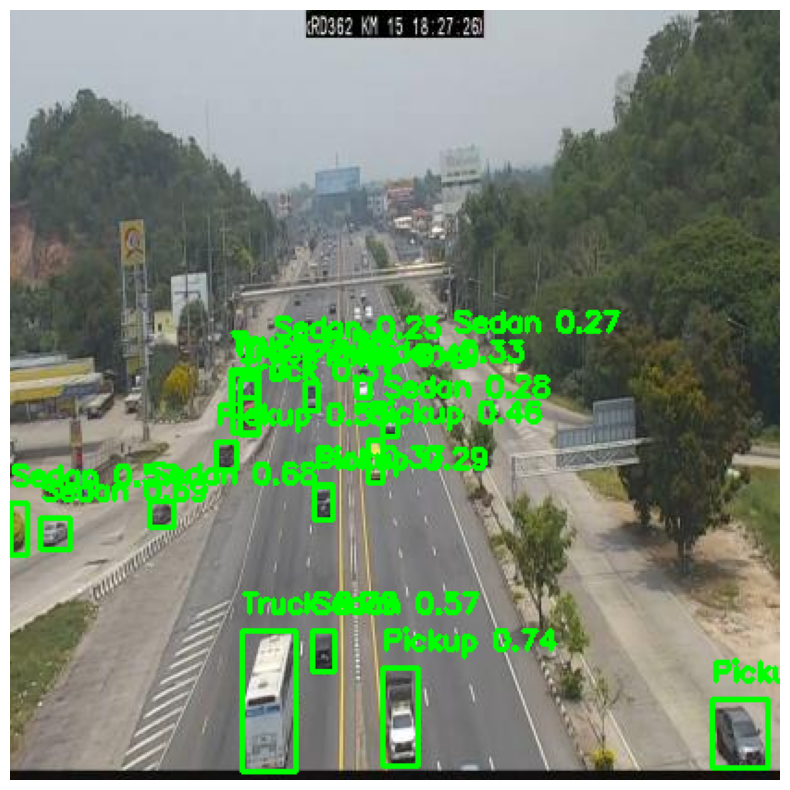

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Perform inference on an image
image_path = '/content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg'  # Replace with your image path
results = model(image_path)  # Run inference

# Load the original image using OpenCV
image = cv2.imread(image_path)

# Loop through the predictions and draw bounding boxes
for result in results:
    boxes = result.boxes.xyxy  # Get the bounding box coordinates in (x1, y1, x2, y2) format
    class_ids = result.boxes.cls  # Get the class IDs for each box
    confidences = result.boxes.conf  # Get the confidence scores for each detection

    # Iterate over each detected object
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        class_id = int(class_ids[i])
        confidence = confidences[i]

        # Draw the bounding box
        color = (0, 255, 0)  # Green color for the box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)  # Draw the bounding box

        # Add label with class name and confidence score
        label = f"{model.names[class_id]} {confidence:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert the image from BGR (OpenCV default) to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()



image 1/1 /content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg: 640x640 6 Pickups, 8 Sedans, 1 Suv, 5 Trucks, 19.3ms
Speed: 5.6ms preprocess, 19.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Skipping malformed line: 8 0.3227975168269231 0.46810226682692313 0.30777878125 0.46964400721153843 0.2855395048076923 0.49431161298076925 0.2881388918269231 0.5302851826923077 0.30300307211538463 0.5283344350961539 0.30286880048076925 0.5302851826923077 0.32510809615384617 0.5030480408653847 0.3227975168269231 0.46810226682692313



<Figure size 3000x3000 with 0 Axes>

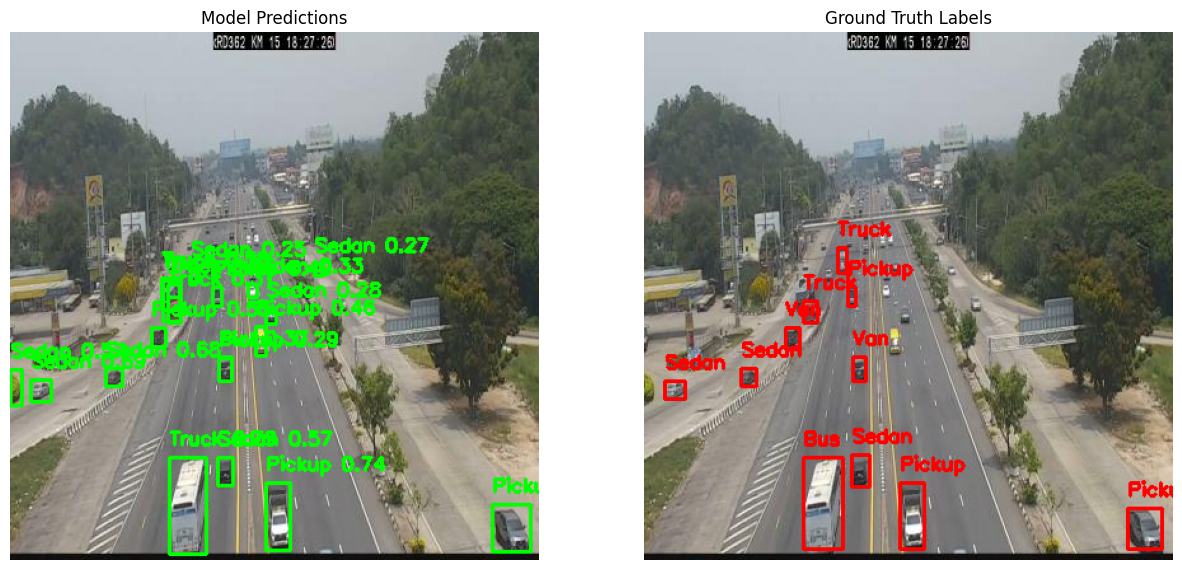

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

plt.figure(figsize = (30,30))
# Helper function to draw bounding boxes
def draw_boxes(image, boxes, class_ids, confidences=None, class_names=None, color=(0, 255, 0)):
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        class_id = int(class_ids[i])

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add label with class name and confidence score (if provided)
        label = f"{class_names[class_id]}" if class_names else f"Class {class_id}"
        if confidences is not None:
            label += f" {confidences[i]:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

def load_labels(label_file, img_width, img_height):
    boxes = []
    class_ids = []
    with open(label_file, 'r') as file:
        for line in file.readlines():
            parts = line.strip().split()
            if len(parts) != 5:  # Check for correct number of values
                print(f"Skipping malformed line: {line}")
                continue
            class_id = int(parts[0])
            try:
                x_center, y_center, width, height = map(float, parts[1:])
            except ValueError as e:
                print(f"Error parsing line: {line}. Error: {e}")
                continue

            # Convert from YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)

            boxes.append([x1, y1, x2, y2])
            class_ids.append(class_id)
    return boxes, class_ids

# Paths to the image and corresponding ground truth labels
image_path = '/content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg'  # Replace with your image path
label_path = '/content/Car-Counting-1/train/labels/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.txt'  # Replace with the corresponding label file path

# Load the original image
image = cv2.imread(image_path)
img_height, img_width, _ = image.shape

# Perform inference on the image (model predictions)
results = model(image_path)

# Prepare two copies of the image: one for predictions and one for ground truth
image_pred = image.copy()  # For model predictions
image_gt = image.copy()  # For ground truth labels

# Draw model's predicted bounding boxes on image_pred
for result in results:
    boxes_pred = result.boxes.xyxy  # Predicted bounding boxes (x1, y1, x2, y2)
    class_ids_pred = result.boxes.cls  # Predicted class IDs
    confidences_pred = result.boxes.conf  # Confidence scores

    image_pred = draw_boxes(image_pred, boxes_pred, class_ids_pred, confidences_pred, model.names)

# Draw ground truth bounding boxes on image_gt
boxes_gt, class_ids_gt = load_labels(label_path, img_width, img_height)
image_gt = draw_boxes(image_gt, boxes_gt, class_ids_gt, class_names=model.names, color=(0, 0, 255))  # Red for ground truth

# Convert BGR (OpenCV format) to RGB for displaying with matplotlib
image_pred_rgb = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)
image_gt_rgb = cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB)

# Display both images side by side using matplotlib
plt.figure(figsize=(15, 10))

# Model Predictions
plt.subplot(1, 2, 1)
plt.imshow(image_pred_rgb)
plt.title('Model Predictions')
plt.axis('off')

# Ground Truth Labels
plt.subplot(1, 2, 2)
plt.imshow(image_gt_rgb)
plt.title('Ground Truth Labels')
plt.axis('off')

plt.show()


In [ ]:
import shutil

# Define the path to the folder and the output ZIP file
folder_path = '/content/runs'  # Replace with your folder path
zip_path = '/content/runs.zip'

# Create a ZIP file from the folder
shutil.make_archive('/content/folder_name', 'zip', folder_path)

'/content/folder_name.zip'